# WCP: OxCGRT clustering

## Contents

- [Introduction](#introduction)
- [Libraries](#libraries)
- [Functions and settings](#functions_and_settings)
- [Datasets collection](#datasets_collection) 
  - [List of datasets](#list_of_datasets) 
  - [Data importing](#data_importing)
  - [Data checking](#data_checking)
- [Clustering](#clustering)
- [Data exporting](#data_exporting)
- [Conclusion](#conclusion)

## Introduction
<a id='introduction'></a>

<div class="alert-info">
Whether the policy actions by governments during the Covid-19 pandemic were similar or not could help us to understand the reasons for their decisions, and the consequent effects, but finding such structure can be hard with standard social science techniques. For example, we might have a theoretical prior that countries with a select cultural background, or geographic proximity, might have sought to dampen the effects of the pandemic in similar ways. But even if that was the case, are such features robust to other factors, like pandemic preparedness, income levels, and experience of infectious diseases? With extensive policy-making data available from sources such as the <a href="https://github.com/OxCGRT/covid-policy-dataset/tree/main" target="_blank">Oxford Covid-19 Government Response Tracker (OxCGRT)</a>, we now have information that might help us to see previously undetected structure in government decisions. 
    
This notebook explores such structure. Clustering alogorithms are used for detecting patterns in Covid-19 policy by governments across the world. 
    
The outputs of the clustering are discussed with the range of theoretical explanations for any of the structures that we might see, such the similarities and differences across the following and other themes:
    
- Regions. 
- Income levels. 
- State capacity. 
- Political systems. 
- Culture.
- Experience of rapidly spreading infectious diseases. 
- Pandemic preparedness. 
- Proxmity to the start of the pandemic. 
    
The first clustering steps in the notebook are used to inform the potential utility of more data collection and exploration, with a view to undertaking clustering and other modelling on larger datasets. 
   
</div>

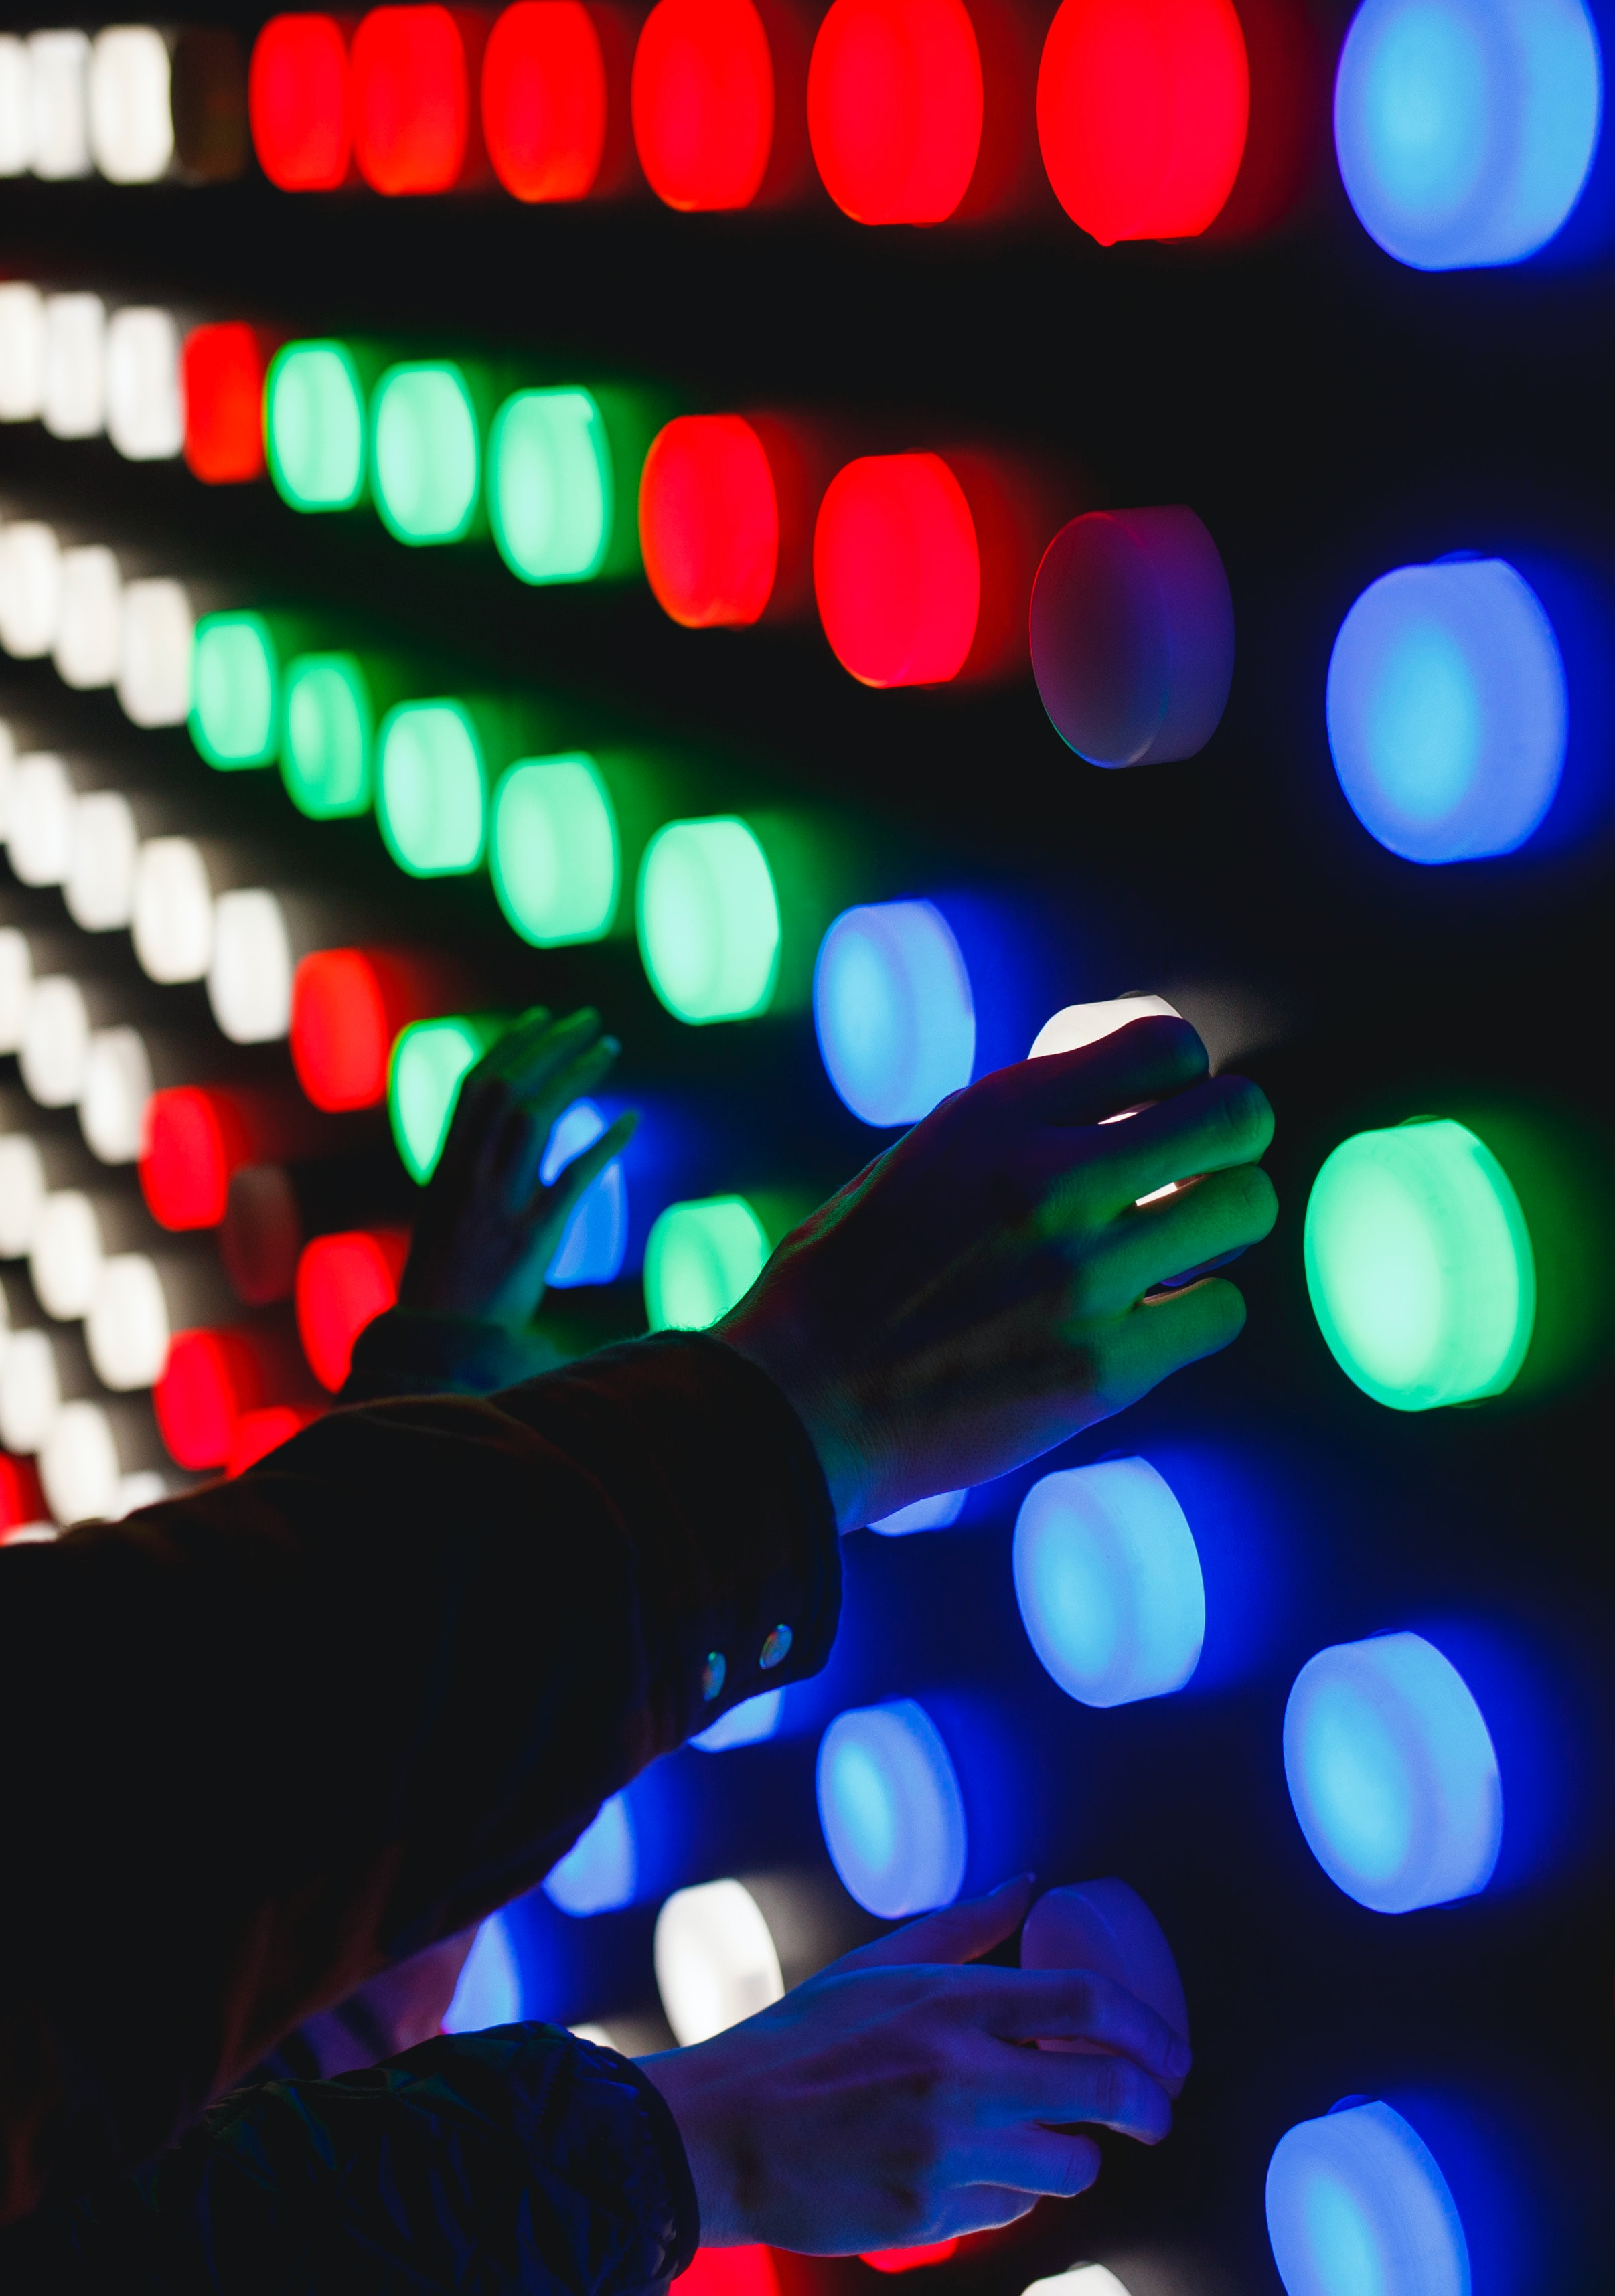

## Libraries
<a id='libraries'></a>

<div class="alert-info">
Importing libraries and packages that are used in the notebook. 
</div>

In [166]:
# Imports packages for managing and manipulating data
import pandas as pd
import numpy as np

# Imports date and time packages for dealing with such
import datetime

# Imports packages for visualising data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Imports modelling packages
from sklearn.cluster import KMeans

## Functions and settings
<a id='functions_and_settings'></a>

<div class="alert-info">
Stating functions and settings that are used in the notebook.
</div>

In [167]:
# EDA checking function to test for basic aspects of data quality
def EDA_checks(dataset):
    #Prints the row labels
    print('ROW LABELS')
    print('')
    print(dataset.index)
    print('')
    #Prints the column names
    print('COLUMN NAMES')
    print('')
    print(dataset.columns)
    print('')
    #Prints the number of rows and columns
    print('NUMBER OF ROWS AND COLUMNS')
    print('')
    print(dataset.shape)
    print('')
    #Prints a concise summary of the dataset
    print('CONCISE SUMMARY')
    print('')
    print(dataset.info())
    print('')
    #Prints a concise summary of the dataset
    print('DESCRIPTION OF ALL COLUMNS')
    print('')
    print(dataset.describe(include = 'all'))
    print('')
    #Prints the number of null values in the dataset
    print('NUMBER OF NULL VALUES BY COLUMN')
    print('')
    print(dataset.describe(include = 'all'))
    print('')
    print(dataset.isnull().sum())

In [168]:
# Function to check for missing and duplicated values across a dataset
def missing_and_duplicated(dataset):
    print('DUPLICATES')
    print('')
    # Gives the sum of the duplicated rows in the dataframe
    duplicated_rows_sum = dataset.duplicated().sum()   
    print(f'There are {duplicated_rows_sum} duplicated rows in the dataset.')
    print('')
    print('The duplicated rows are as follows:')
    # Locates the duplicated rows of in the dataframe
    duplicated_rows = dataset[dataset.duplicated(keep=False)]
    display(duplicated_rows)
    print('NULLS')
    print('')
    # Gives the sum of null values
    null_values_sum = dataset.isna().sum().sum()
    print(f'There are {null_values_sum} null values in the dataset.')
    print('')
    print('The null values are in the following columns:')
    # Gives missing values by the rows in the dataframe
    null_values_by_column = dataset.isna().sum(axis = 0)
    display(null_values_by_column)
    print('')
    print('The null values above account for the following percentages of all null values:')
    # Gives the number of missing entries as a percentage of the dataframe, using the result from 'shape'
    nulls_percentage = dataset.isna().sum(axis = 0) / dataset.shape[0] * 100 
    display(nulls_percentage)

## Data dictionary
<a id='data_dictionary'></a>

Variable | Description | Scores 
--- | --- | --- |
CountryName   | Name of the country | N/A
CountryCode   | Code of the country | N/A
Date   | Code of the country | N/A
C1M_combined_numeric   | Records closings of schools and universities | 0 - no measures; 1 - recommend closing or all schools open with alterations resulting in significant differences compared to non-Covid-19 operations; 2 - require closing (only some levels or categories, eg just high school, or just public schools); 3 - require closing all levels; Blank - no data
C2M_combined_numeric   | Records closings of workplaces | 0 - no measures; 1 - recommend closing (or recommend work from home) or all businesses open with alterations resulting in significant differences compared to non-Covid-19 operation; 2 - require closing (or work from home) for some sectors or categories of workers; 3 - require closing (or work from home) for all-but-essential workplaces (eg grocery stores, doctors); Blank - no data
C3M_combined_numeric   | Records cancelling public events | 0 - no measures; 1 - recommend cancelling; 2 - require cancelling; Blank - no data
C4M_combined_numeric   | Records the cut-off size for limits on gatherings | 0 - no restrictions; 1 - restrictions on very large gatherings (the limit is above 1000 people); 2 - restrictions on gatherings between 101-1000 people; 3 - restrictions on gatherings between 11-100 people; 4 - restrictions on gatherings of 10 people or less; Blank - no data
C5M_combined_numeric   | Records closing of public transport | 0 - no measures; 1 - recommend closing (or significantly reduce volume/route/means of transport available); 2 - require closing (or prohibit most citizens from using it); Blank - no data
C6M_combined_numeric   | Records orders to "shelter-in-place" and otherwise confine to the home | 0 - no measures; 1 - recommend not leaving house; 2 - require not leaving house with exceptions for daily exercise, grocery shopping, and 'essential' trips; 3 - require not leaving house with minimal exceptions (eg allowed to leave once a week, or only one person can leave at a time, etc); Blank - no data
C7M_combined_numeric   | Records restrictions on internal movement between cities/regions | 0 - no measures; 1 - recommend not to travel between regions/cities; 2 - internal movement restrictions in place; Blank - no data
C8EV_combined_numeric   | Records restrictions on international travel for foreign travellers, not citizens | 0 - no restrictions; 1 - screening arrivals; 2 - quarantine arrivals from some or all regions; 3 - ban arrivals from some regions; 4 - ban on all regions or total border closure; Blank - no data
E1_combined_numeric   | Records if the government is providing direct cash payments to people who lose their jobs or cannot work. Only includes payments to firms if explicitly linked to payroll/salaries | 0 - no income support; 1 - government is replacing less than 50% of lost salary (or if a flat sum, it is less than 50% median salary); 2 - government is replacing 50% or more of lost salary (or if a flat sum, it is greater than 50% median salary); Blank - no data
E2_combined_numeric   | Records if the government is freezing financial obligations for households (eg stopping loan repayments, preventing services like water from stopping, or banning evictions) | 0 - no debt/contract relief; 1 - narrow relief, specific to one kind of contract; 2 - broad debt/contract relief
H1_combined_numeric   | Records presence of public info campaigns | 0 - no Covid-19 public information campaign; 1 - public officials urging caution about Covid-19; 2- coordinated public information campaign (eg across traditional and social media); Blank - no data
H2_combined_numeric   | Records government policy on who has access to testing. Records policies about testing for current infection (PCR tests) not testing for immunity (antibody test) | 0 - no testing policy; 1 - only those who both (a) have symptoms AND (b) meet specific criteria (eg key workers, admitted to hospital, came into contact with a known case, returned from overseas); 2 - testing of anyone showing Covid-19 symptoms; 3 - open public testing (eg "drive through" testing available to asymptomatic people); Blank - no data
H3_combined_numeric   | Records government policy on contact tracing after a positive diagnosis | 0 - no contact tracing; 1 - limited contact tracing; not done for all cases; 2 - comprehensive contact tracing; done for all identified cases
H6M_combined_numeric   | Record policies on the use of facial coverings outside the home | 0 - No policy; 1 - Recommended; 2 - Required in some specified shared/public spaces outside the home with other people present, or some situations when social distancing not possible; 3 - Required in all shared/public spaces outside the home with other people present or all situations when social distancing not possible; 4 - Required outside the home at all times regardless of location or presence of other people
H7_combined_numeric   | Records policies for vaccine delivery for different groups | 0 - No availability; 1 - Availability for ONE of following: key workers/ clinically vulnerable groups (non elderly) / elderly groups; 2 - Availability for TWO of following: key workers/ clinically vulnerable groups (non elderly) / elderly groups; 3 - Availability for ALL of following: key workers/ clinically vulnerable groups (non elderly) / elderly groups; 4 - Availability for all three plus partial additional availability (select broad groups/ages); 5 - Universal availability
H8M_combined_numeric   | Records policies for protecting elderly people (as defined locally) in Long Term Care Facilities and/or the community and home setting | 0 - no measures; 1 - Recommended isolation, hygiene, and visitor restriction measures in LTCFs and/or elderly people to stay at home; 2 - Narrow restrictions for isolation, hygiene in LTCFs, some limitations on external visitors and/or restrictions protecting elderly people at home; 3 - Extensive restrictions for isolation and hygiene in LTCFs, all non-essential external visitors prohibited, and/or all elderly people required to stay at home and not leave the home with minimal exceptions, and receive no external visitors; Blank - no data
V1..summary.   | Summarises the existence of a prioritised plan for vaccine rollout | Blank – no data; 0 - no plan; 1 – a prioritised plan is in place; 2 – universal/general eligibility; no prioritisation between groups
V2..summary.   | Summarises vaccine availability and eligibility | N/A
V3..summary.   | Summarises the overall approach taken to vaccine funding – whether paid by the individual or the government | Blank - no data; 0 – no availability; 1 – full cost to the individual for all categories identified in V2; 2 – full cost to the individual for some categories identified in V2, some subsidy for other categories; 3- partial funding by the government for all of the categories identified in V2; 4 – partial funding by the government for some categories identified in V2, full funding for other categories; 5 – all categories fully funded by the government
StringencyIndex_Average   | Index of the stringency meaures | N/A
GovernmentResponseIndex_Average   | Index of the government response meaures | N/A
ContainmentHealthIndex_Average   | Index of the health containment meaures | N/A
EconomicSupportIndex   | Index of the economic supoort meaures | N/A

## Datasets collection
<a id='datasets_collection'></a>

<div class="alert-info">
This notebook uses the simplified covid policy data set that was originally from the <a href="https://github.com/OxCGRT/covid-policy-dataset/tree/main" target="_blank">OxCGRT Github repository</a>, and was cleaned in the <a href="https://github.com/LawrenceKay/worldwide_covid_policy/blob/main/notebooks/WCP_oxcgrt_cleaning.ipynb" target="_blank">OxCGRT cleaning notebook</a>.
    
    
    
</div>

### List of datasets
<a id='list_of_datasets'></a>

<div class="alert-info">
[Insert]
</div>

### Data importing
<a id='data_importing'></a>

<div class="alert-info">
Importing the datasets used in the notebook. 
</div>

In [169]:
# Imports the dataset
oxcgrt_simple = pd.read_csv('~/css/projects/wcp/data/oxcgrt_simple.csv', on_bad_lines='skip', low_memory=False, index_col=0)

### Data checking
<a id='data_checking'></a>

<div class="alert-info">
We've imported the data that we want. Let's do some brief checks of it before we proceed. 
</div>

In [170]:
# Checks that the data has been imported properly
oxcgrt_simple

,CountryName,CountryCode,C1M_combined_numeric,C2M_combined_numeric,C3M_combined_numeric,C4M_combined_numeric,C5M_combined_numeric,C6M_combined_numeric,C7M_combined_numeric,C8EV_combined_numeric,...,H7_combined_numeric,H8M_combined_numeric,V1..summary.,V2..summary.,V3..summary.,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex,World Bank region
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0,0.00,0.00,0.00,0.0,Latin America and Caribbean
2020-01-02,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0,0.00,0.00,0.00,0.0,Latin America and Caribbean
2020-01-03,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0,0.00,0.00,0.00,0.0,Latin America and Caribbean
2020-01-04,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0,0.00,0.00,0.00,0.0,Latin America and Caribbean
2020-01-05,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0,0.00,0.00,0.00,0.0,Latin America and Caribbean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,Zimbabwe,ZWE,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1,...,5.0,0.0,2,3,5,29.48,36.44,41.65,0.0,Sub-Saharan Africa
2022-12-28,Zimbabwe,ZWE,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1,...,5.0,0.0,2,3,5,29.48,36.44,41.65,0.0,Sub-Saharan Africa
2022-12-29,Zimbabwe,ZWE,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1,...,5.0,0.0,2,3,5,29.48,36.44,41.65,0.0,Sub-Saharan Africa


In [171]:
# Runs basic EDA checks on the data
EDA_checks(oxcgrt_simple)

ROW LABELS

Index(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
       '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
       ...
       '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26',
       '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2022-12-31'],
      dtype='object', name='Date', length=202760)

COLUMN NAMES

Index(['CountryName', 'CountryCode', 'C1M_combined_numeric',
       'C2M_combined_numeric', 'C3M_combined_numeric', 'C4M_combined_numeric',
       'C5M_combined_numeric', 'C6M_combined_numeric', 'C7M_combined_numeric',
       'C8EV_combined_numeric', 'E1_combined_numeric', 'E2_combined_numeric',
       'H1_combined_numeric', 'H2_combined_numeric', 'H3_combined_numeric',
       'H6M_combined_numeric', 'H7_combined_numeric', 'H8M_combined_numeric',
       'V1..summary.', 'V2..summary.', 'V3..summary.',
       'StringencyIndex_Average', 'GovernmentResponseIndex_Average',
       'ContainmentHealthInd

       CountryName CountryCode  C1M_combined_numeric  C2M_combined_numeric  \
count       202760      202760         202760.000000         202760.000000   
unique         185         185                   NaN                   NaN   
top          Aruba         ABW                   NaN                   NaN   
freq          1096        1096                   NaN                   NaN   
mean           NaN         NaN              1.141095              1.082862   
std            NaN         NaN              1.097689              0.936298   
min            NaN         NaN              0.000000              0.000000   
25%            NaN         NaN              0.000000              0.000000   
50%            NaN         NaN              1.000000              1.000000   
75%            NaN         NaN              2.000000              2.000000   
max            NaN         NaN              3.000000              3.000000   

        C3M_combined_numeric  C4M_combined_numeric  C5M_combine

In [172]:
# Checks for missing data and duplicated rows in the data
missing_and_duplicated(oxcgrt_simple)

DUPLICATES

There are 179910 duplicated rows in the dataset.

The duplicated rows are as follows:


,CountryName,CountryCode,C1M_combined_numeric,C2M_combined_numeric,C3M_combined_numeric,C4M_combined_numeric,C5M_combined_numeric,C6M_combined_numeric,C7M_combined_numeric,C8EV_combined_numeric,...,H7_combined_numeric,H8M_combined_numeric,V1..summary.,V2..summary.,V3..summary.,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex,World Bank region
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0,0.00,0.00,0.00,0.0,Latin America and Caribbean
2020-01-02,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0,0.00,0.00,0.00,0.0,Latin America and Caribbean
2020-01-03,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0,0.00,0.00,0.00,0.0,Latin America and Caribbean
2020-01-04,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0,0.00,0.00,0.00,0.0,Latin America and Caribbean
2020-01-05,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0,0.00,0.00,0.00,0.0,Latin America and Caribbean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,Zimbabwe,ZWE,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1,...,5.0,0.0,2,3,5,29.48,36.44,41.65,0.0,Sub-Saharan Africa
2022-12-28,Zimbabwe,ZWE,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1,...,5.0,0.0,2,3,5,29.48,36.44,41.65,0.0,Sub-Saharan Africa
2022-12-29,Zimbabwe,ZWE,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1,...,5.0,0.0,2,3,5,29.48,36.44,41.65,0.0,Sub-Saharan Africa


NULLS

There are 0 null values in the dataset.

The null values are in the following columns:


CountryName                        0
CountryCode                        0
C1M_combined_numeric               0
C2M_combined_numeric               0
C3M_combined_numeric               0
C4M_combined_numeric               0
C5M_combined_numeric               0
C6M_combined_numeric               0
C7M_combined_numeric               0
C8EV_combined_numeric              0
E1_combined_numeric                0
E2_combined_numeric                0
H1_combined_numeric                0
H2_combined_numeric                0
H3_combined_numeric                0
H6M_combined_numeric               0
H7_combined_numeric                0
H8M_combined_numeric               0
V1..summary.                       0
V2..summary.                       0
V3..summary.                       0
StringencyIndex_Average            0
GovernmentResponseIndex_Average    0
ContainmentHealthIndex_Average     0
EconomicSupportIndex               0
World Bank region                  0
dtype: int64


The null values above account for the following percentages of all null values:


CountryName                        0.0
CountryCode                        0.0
C1M_combined_numeric               0.0
C2M_combined_numeric               0.0
C3M_combined_numeric               0.0
C4M_combined_numeric               0.0
C5M_combined_numeric               0.0
C6M_combined_numeric               0.0
C7M_combined_numeric               0.0
C8EV_combined_numeric              0.0
E1_combined_numeric                0.0
E2_combined_numeric                0.0
H1_combined_numeric                0.0
H2_combined_numeric                0.0
H3_combined_numeric                0.0
H6M_combined_numeric               0.0
H7_combined_numeric                0.0
H8M_combined_numeric               0.0
V1..summary.                       0.0
V2..summary.                       0.0
V3..summary.                       0.0
StringencyIndex_Average            0.0
GovernmentResponseIndex_Average    0.0
ContainmentHealthIndex_Average     0.0
EconomicSupportIndex               0.0
World Bank region        

<div class="alert-info">
The dataset is largely as expected. We're not missing any values and the duplicate rows is what we would expect for recordings that were often zero for many countries at the start of the pandemic. 
    
We only need to reset the index to datetime. 
</div>

In [173]:
# Resets the index
oxcgrt_simple.reset_index(inplace = True)

In [174]:
# Checks the change
oxcgrt_simple

,Date,CountryName,CountryCode,C1M_combined_numeric,C2M_combined_numeric,C3M_combined_numeric,C4M_combined_numeric,C5M_combined_numeric,C6M_combined_numeric,C7M_combined_numeric,...,H7_combined_numeric,H8M_combined_numeric,V1..summary.,V2..summary.,V3..summary.,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex,World Bank region
0,2020-01-01,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0.00,0.00,0.00,0.0,Latin America and Caribbean
1,2020-01-02,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0.00,0.00,0.00,0.0,Latin America and Caribbean
2,2020-01-03,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0.00,0.00,0.00,0.0,Latin America and Caribbean
3,2020-01-04,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0.00,0.00,0.00,0.0,Latin America and Caribbean
4,2020-01-05,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0.00,0.00,0.00,0.0,Latin America and Caribbean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202755,2022-12-27,Zimbabwe,ZWE,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,5.0,0.0,2,3,5,29.48,36.44,41.65,0.0,Sub-Saharan Africa
202756,2022-12-28,Zimbabwe,ZWE,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,5.0,0.0,2,3,5,29.48,36.44,41.65,0.0,Sub-Saharan Africa
202757,2022-12-29,Zimbabwe,ZWE,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,5.0,0.0,2,3,5,29.48,36.44,41.65,0.0,Sub-Saharan Africa
202758,2022-12-30,Zimbabwe,ZWE,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,5.0,0.0,2,3,5,29.48,36.44,41.65,0.0,Sub-Saharan Africa


In [175]:
# Sets the date columnn to datetime by inferring the format
oxcgrt_simple['Date'] = pd.to_datetime(oxcgrt_simple['Date'], infer_datetime_format=True)

In [176]:
# Sets the date column as the index
oxcgrt_simple.set_index('Date', inplace=True)

In [177]:
# Checks the change
oxcgrt_simple

,CountryName,CountryCode,C1M_combined_numeric,C2M_combined_numeric,C3M_combined_numeric,C4M_combined_numeric,C5M_combined_numeric,C6M_combined_numeric,C7M_combined_numeric,C8EV_combined_numeric,...,H7_combined_numeric,H8M_combined_numeric,V1..summary.,V2..summary.,V3..summary.,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex,World Bank region
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0,0.00,0.00,0.00,0.0,Latin America and Caribbean
2020-01-02,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0,0.00,0.00,0.00,0.0,Latin America and Caribbean
2020-01-03,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0,0.00,0.00,0.00,0.0,Latin America and Caribbean
2020-01-04,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0,0.00,0.00,0.00,0.0,Latin America and Caribbean
2020-01-05,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0,0.00,0.00,0.00,0.0,Latin America and Caribbean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,Zimbabwe,ZWE,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1,...,5.0,0.0,2,3,5,29.48,36.44,41.65,0.0,Sub-Saharan Africa
2022-12-28,Zimbabwe,ZWE,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1,...,5.0,0.0,2,3,5,29.48,36.44,41.65,0.0,Sub-Saharan Africa
2022-12-29,Zimbabwe,ZWE,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1,...,5.0,0.0,2,3,5,29.48,36.44,41.65,0.0,Sub-Saharan Africa


## Clustering
<a id='clustering'></a>

<div class="alert-info">
We're starting the clustering with an aim, some competing explanations for any structure that we find, and data that is both simple and comprehensive. We'll use a few clustering algorithms like k-means, density-based spatial clustering of applications with noise (DBSCAN), and perhaps some Gaussian Mixture Models and hierarchical approaches, to test if there is undetected structure in the policy choices of governments during Covid-19. Doing so will necessitate working through a number of the policy variables on offer. 
    

<br>
    
We'll start with an exploration of potential clusters. The easiest way to do that is by reducing the number of dimensions in use, and we'll apply that approach by taking means at the global level for various policy variables. Resampling the data by eay time windows - such as years - is the first thing that we need to do.  
</div>

In [178]:
# Resamples the dataframe to put all of the yearly measurements across the world together
oxcgrt_simple_datetime_yearly = oxcgrt_simple.resample('Y').mean()

In [179]:
# Checks new dataframe
oxcgrt_simple_datetime_yearly

,C1M_combined_numeric,C2M_combined_numeric,C3M_combined_numeric,C4M_combined_numeric,C5M_combined_numeric,C6M_combined_numeric,C7M_combined_numeric,C8EV_combined_numeric,E1_combined_numeric,E2_combined_numeric,...,H6M_combined_numeric,H7_combined_numeric,H8M_combined_numeric,V1..summary.,V2..summary.,V3..summary.,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,1.686029,1.241087,1.257503,2.246839,0.492401,0.858182,0.733090,2.474967,0.628053,0.883887,...,1.681783,0.010087,1.122929,0.017929,0.006956,0.040984,50.248240,44.761156,45.756029,37.798516
2021-12-31,1.279260,1.364235,1.336039,2.738704,0.479711,0.961644,0.628389,2.227234,0.702510,0.840711,...,2.817164,3.429308,1.228197,1.377904,1.590404,4.311899,51.805365,54.191981,56.422262,38.580526
2022-12-31,0.456505,0.642829,0.570959,0.888538,0.161770,0.205117,0.173647,0.900585,0.392477,0.387886,...,2.081710,4.919511,0.599963,1.967183,2.731507,4.957097,25.951926,35.620455,37.922052,19.509071


In [180]:
# Creates 2020 year 
oxcgrt_simple_datetime_yearly_2020 = oxcgrt_simple_datetime_yearly.loc['2020-12-31':'2020-12-31']

In [181]:
# Checks new dataframe
oxcgrt_simple_datetime_yearly_2020

,C1M_combined_numeric,C2M_combined_numeric,C3M_combined_numeric,C4M_combined_numeric,C5M_combined_numeric,C6M_combined_numeric,C7M_combined_numeric,C8EV_combined_numeric,E1_combined_numeric,E2_combined_numeric,...,H6M_combined_numeric,H7_combined_numeric,H8M_combined_numeric,V1..summary.,V2..summary.,V3..summary.,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,1.686029,1.241087,1.257503,2.246839,0.492401,0.858182,0.73309,2.474967,0.628053,0.883887,...,1.681783,0.010087,1.122929,0.017929,0.006956,0.040984,50.24824,44.761156,45.756029,37.798516


In [182]:
# Creates 2021 year 
oxcgrt_simple_datetime_yearly_2021 = oxcgrt_simple_datetime_yearly.loc['2021-12-31':'2021-12-31']

In [183]:
# Checks new dataframe
oxcgrt_simple_datetime_yearly_2021

,C1M_combined_numeric,C2M_combined_numeric,C3M_combined_numeric,C4M_combined_numeric,C5M_combined_numeric,C6M_combined_numeric,C7M_combined_numeric,C8EV_combined_numeric,E1_combined_numeric,E2_combined_numeric,...,H6M_combined_numeric,H7_combined_numeric,H8M_combined_numeric,V1..summary.,V2..summary.,V3..summary.,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-31,1.27926,1.364235,1.336039,2.738704,0.479711,0.961644,0.628389,2.227234,0.70251,0.840711,...,2.817164,3.429308,1.228197,1.377904,1.590404,4.311899,51.805365,54.191981,56.422262,38.580526


In [184]:
# Creates 2022 year 
oxcgrt_simple_datetime_yearly_2022 = oxcgrt_simple_datetime_yearly.loc['2022-12-31':'2022-12-31']

In [185]:
# Checks new dataframe
oxcgrt_simple_datetime_yearly_2022

,C1M_combined_numeric,C2M_combined_numeric,C3M_combined_numeric,C4M_combined_numeric,C5M_combined_numeric,C6M_combined_numeric,C7M_combined_numeric,C8EV_combined_numeric,E1_combined_numeric,E2_combined_numeric,...,H6M_combined_numeric,H7_combined_numeric,H8M_combined_numeric,V1..summary.,V2..summary.,V3..summary.,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-31,0.456505,0.642829,0.570959,0.888538,0.16177,0.205117,0.173647,0.900585,0.392477,0.387886,...,2.08171,4.919511,0.599963,1.967183,2.731507,4.957097,25.951926,35.620455,37.922052,19.509071


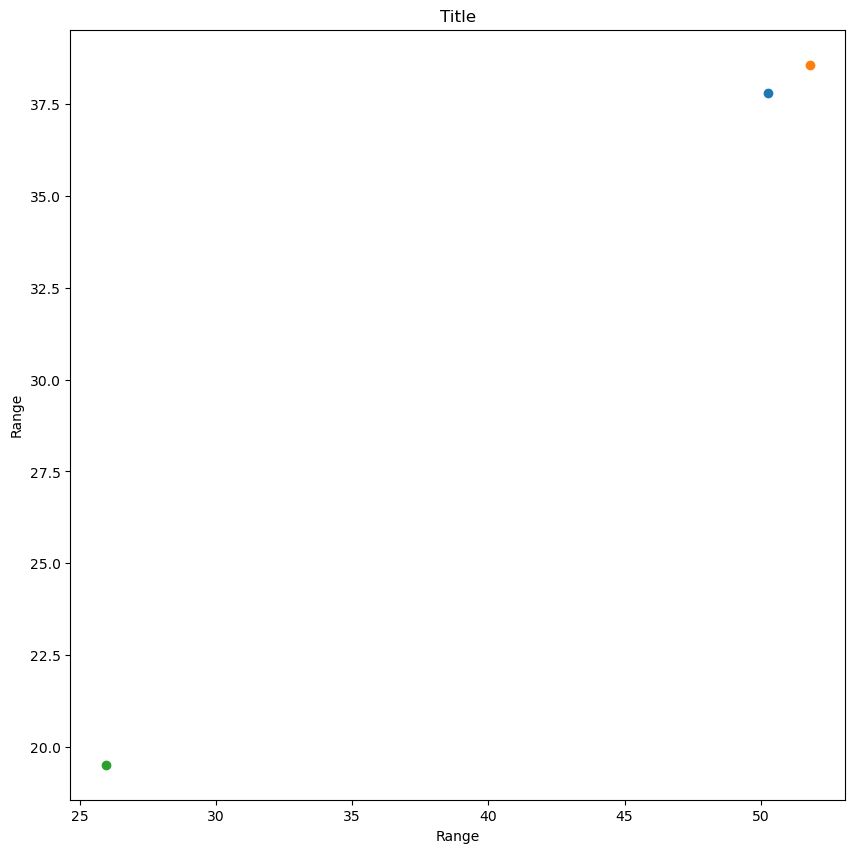

In [186]:
# Scatter plot for selected variables
plt.figure(figsize = (10, 10))

# Scatters the data
plt.scatter(x = oxcgrt_simple_datetime_yearly_2020['StringencyIndex_Average'], 
            y = oxcgrt_simple_datetime_yearly_2020['EconomicSupportIndex'])

plt.scatter(x = oxcgrt_simple_datetime_yearly_2021['StringencyIndex_Average'], 
            y = oxcgrt_simple_datetime_yearly_2021['EconomicSupportIndex'])

plt.scatter(x = oxcgrt_simple_datetime_yearly_2022['StringencyIndex_Average'], 
            y = oxcgrt_simple_datetime_yearly_2022['EconomicSupportIndex'])


# Adds title
plt.title('Title')

# Adds axes titles
plt.ylabel('Range')
plt.xlabel('Range')

# Shows the chart
plt.show()

In [187]:
# Resamples the dataframe to put all of the yearly measurements across the world together
oxcgrt_simple_datetime_monthly = oxcgrt_simple.resample('M').mean()

In [188]:
# Checks new dataframe
oxcgrt_simple_datetime_monthly

,C1M_combined_numeric,C2M_combined_numeric,C3M_combined_numeric,C4M_combined_numeric,C5M_combined_numeric,C6M_combined_numeric,C7M_combined_numeric,C8EV_combined_numeric,E1_combined_numeric,E2_combined_numeric,...,H6M_combined_numeric,H7_combined_numeric,H8M_combined_numeric,V1..summary.,V2..summary.,V3..summary.,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,0.012816,0.006103,0.009677,0.007847,0.002354,0.003575,0.002354,0.103575,0.000000,0.000000,...,0.017524,0.000000,0.024412,0.000000,0.000000,0.005405,1.465810,1.362237,1.556990,0.000000
2020-02-29,0.131594,0.054054,0.073066,0.042777,0.010624,0.034296,0.018173,0.897484,0.004660,0.013234,...,0.066636,0.000000,0.080801,0.000000,0.000000,0.005405,8.361463,7.083059,8.031715,0.447344
2020-03-31,1.596164,0.885004,1.068091,1.396164,0.342023,0.536094,0.533043,2.354141,0.202441,0.301831,...,0.159285,0.000000,0.748649,0.000000,0.000000,0.005405,40.976926,31.187740,33.842094,12.606800
2020-04-30,2.842793,2.202252,1.884234,3.195225,1.056667,1.612523,1.454054,3.587207,0.710360,1.027568,...,0.871622,0.000000,1.700721,0.000000,0.000000,0.005405,78.760272,61.540886,64.125286,43.448198
2020-05-31,2.627986,1.837489,1.826591,3.182650,0.878378,1.410375,1.276373,3.521883,0.828596,1.171752,...,1.637489,0.000000,1.610201,0.000000,0.000000,0.005405,73.467667,61.098272,62.682457,50.008718
2020-06-30,2.258739,1.469279,1.618288,2.757568,0.691081,1.074234,0.956486,3.343604,0.854505,1.206306,...,1.982432,0.000000,1.394865,0.000000,0.000000,0.005405,63.860654,56.523899,57.239128,51.520270
2020-07-31,2.070445,1.349956,1.467916,2.579861,0.595641,0.891630,0.828160,3.110549,0.844202,1.173147,...,2.162511,0.000000,1.291456,0.000000,0.000000,0.005405,58.734469,53.738546,54.211114,50.433740
2020-08-31,2.043418,1.442284,1.437838,2.628858,0.545772,0.923278,0.817262,2.891194,0.849520,1.184830,...,2.443592,0.000000,1.291630,0.003139,0.000000,0.008544,58.100600,54.031433,54.484661,50.858762
2020-09-30,1.805045,1.399189,1.424595,2.629279,0.475135,0.903514,0.729369,2.693153,0.838198,1.193694,...,2.572432,0.000000,1.301441,0.005405,0.000000,0.010811,55.398323,52.811249,53.099097,50.797297


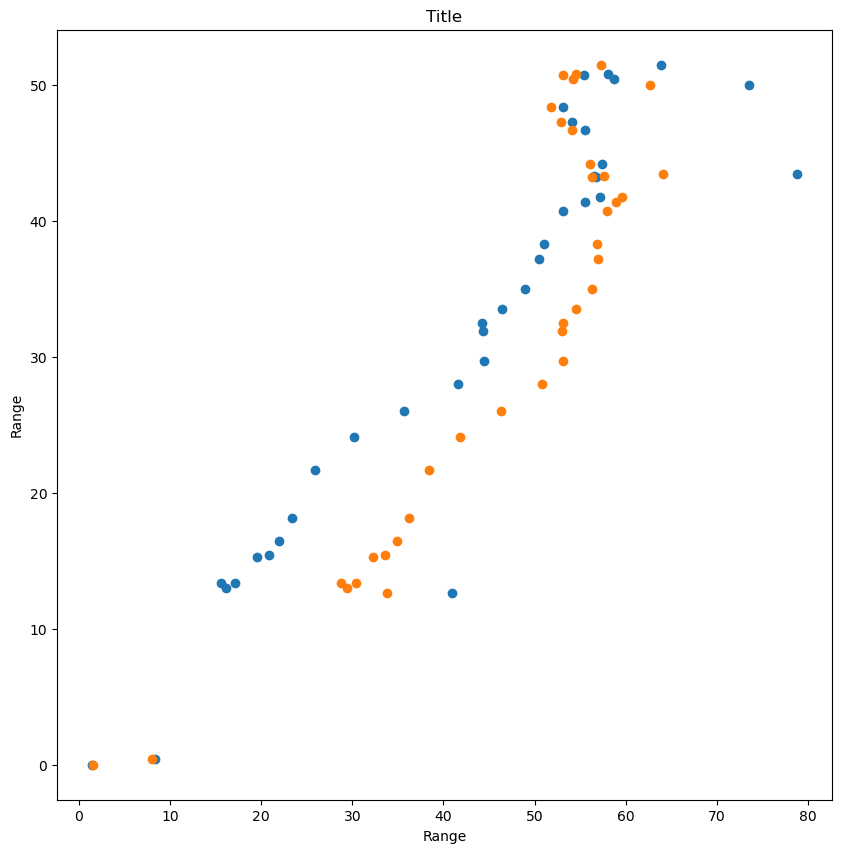

In [189]:
# Scatter plot for selected variables
plt.figure(figsize = (10, 10))

# Scatters the data
plt.scatter(x = oxcgrt_simple_datetime_monthly['StringencyIndex_Average'], 
            y = oxcgrt_simple_datetime_monthly['EconomicSupportIndex'])

# Scatters the data
plt.scatter(x = oxcgrt_simple_datetime_monthly['ContainmentHealthIndex_Average'], 
            y = oxcgrt_simple_datetime_monthly['EconomicSupportIndex'])

# Adds title
plt.title('Title')

# Adds axes titles
plt.ylabel('Range')
plt.xlabel('Range')

# Shows the chart
plt.show()

In [190]:
oxcgrt_simple.columns

Index(['CountryName', 'CountryCode', 'C1M_combined_numeric',
       'C2M_combined_numeric', 'C3M_combined_numeric', 'C4M_combined_numeric',
       'C5M_combined_numeric', 'C6M_combined_numeric', 'C7M_combined_numeric',
       'C8EV_combined_numeric', 'E1_combined_numeric', 'E2_combined_numeric',
       'H1_combined_numeric', 'H2_combined_numeric', 'H3_combined_numeric',
       'H6M_combined_numeric', 'H7_combined_numeric', 'H8M_combined_numeric',
       'V1..summary.', 'V2..summary.', 'V3..summary.',
       'StringencyIndex_Average', 'GovernmentResponseIndex_Average',
       'ContainmentHealthIndex_Average', 'EconomicSupportIndex',
       'World Bank region'],
      dtype='object')

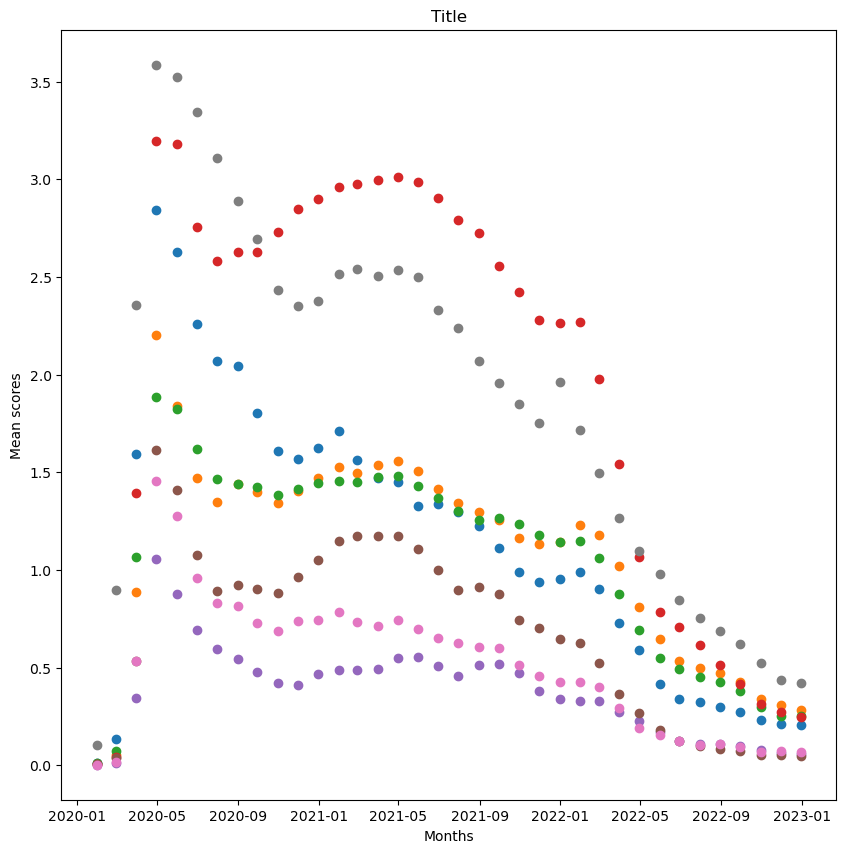

In [191]:
# Scatter plot for selected variables
plt.figure(figsize = (10, 10))

# Scatters the data
plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['C1M_combined_numeric'])

plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['C2M_combined_numeric'])

plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['C3M_combined_numeric'])

plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['C4M_combined_numeric'])

plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['C5M_combined_numeric'])

plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['C6M_combined_numeric'])

plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['C7M_combined_numeric'])

plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['C8EV_combined_numeric'])


# Adds title
plt.title('Title')

# Adds axes titles
plt.ylabel('Mean scores')
plt.xlabel('Months')

# Shows the chart
plt.show()

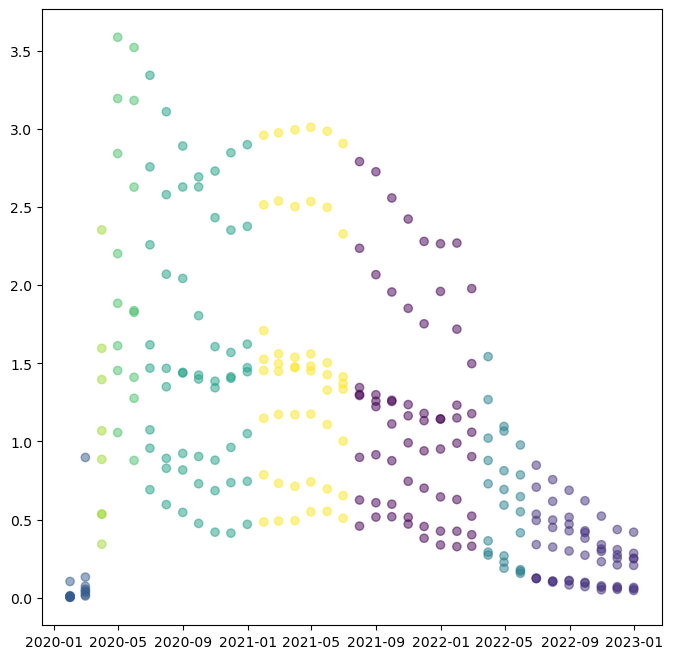

In [193]:
from sklearn.cluster import AgglomerativeClustering

# Initialises the agglomeration with a select nymber of clusters
agglomerative = AgglomerativeClustering(n_clusters=8, linkage='ward')

# Fit and predict
cluster_labels = agglomerative.fit_predict(oxcgrt_simple_datetime_monthly)

# Visualize with centers
plt.figure(figsize=(8, 8))

plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['C1M_combined_numeric'],
            c=cluster_labels, alpha=0.5)

plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['C2M_combined_numeric'],
            c=cluster_labels, alpha=0.5)

plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['C3M_combined_numeric'],
            c=cluster_labels, alpha=0.5)

plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['C4M_combined_numeric'],
            c=cluster_labels, alpha=0.5)

plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['C5M_combined_numeric'],
            c=cluster_labels, alpha=0.5)

plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['C6M_combined_numeric'],
            c=cluster_labels, alpha=0.5)

plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['C7M_combined_numeric'],
            c=cluster_labels, alpha=0.5)

plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['C8EV_combined_numeric'],
            c=cluster_labels, alpha=0.5)

plt.show()

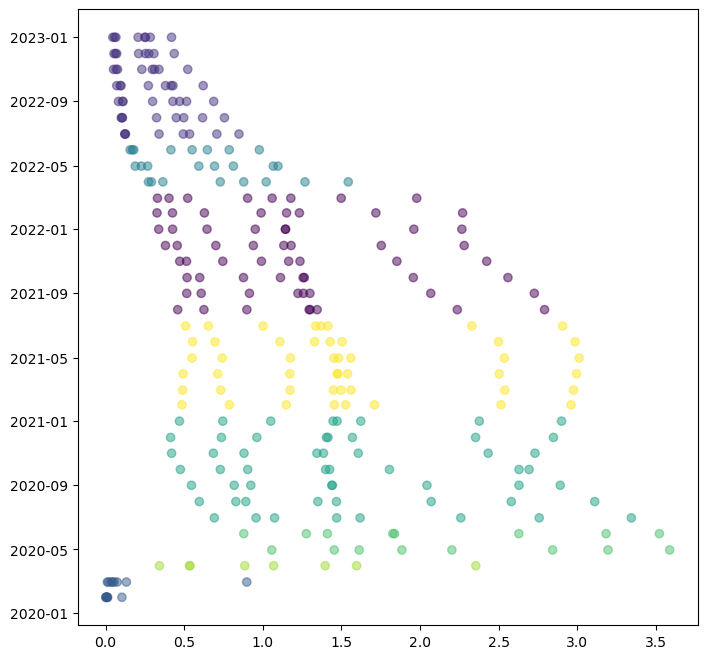

In [194]:
from sklearn.cluster import AgglomerativeClustering

# Initialises the agglomeration with a select nymber of clusters
agglomerative = AgglomerativeClustering(n_clusters=8, linkage='ward')

# Fit and predict
cluster_labels = agglomerative.fit_predict(oxcgrt_simple_datetime_monthly)

# Visualize with centers
plt.figure(figsize=(8, 8))

plt.scatter(y = oxcgrt_simple_datetime_monthly.index, 
            x = oxcgrt_simple_datetime_monthly['C1M_combined_numeric'],
            c=cluster_labels, alpha=0.5)

plt.scatter(y = oxcgrt_simple_datetime_monthly.index, 
            x = oxcgrt_simple_datetime_monthly['C2M_combined_numeric'],
            c=cluster_labels, alpha=0.5)

plt.scatter(y = oxcgrt_simple_datetime_monthly.index, 
            x = oxcgrt_simple_datetime_monthly['C3M_combined_numeric'],
            c=cluster_labels, alpha=0.5)

plt.scatter(y = oxcgrt_simple_datetime_monthly.index, 
            x = oxcgrt_simple_datetime_monthly['C4M_combined_numeric'],
            c=cluster_labels, alpha=0.5)

plt.scatter(y = oxcgrt_simple_datetime_monthly.index, 
            x = oxcgrt_simple_datetime_monthly['C5M_combined_numeric'],
            c=cluster_labels, alpha=0.5)

plt.scatter(y = oxcgrt_simple_datetime_monthly.index, 
            x = oxcgrt_simple_datetime_monthly['C6M_combined_numeric'],
            c=cluster_labels, alpha=0.5)

plt.scatter(y = oxcgrt_simple_datetime_monthly.index, 
            x = oxcgrt_simple_datetime_monthly['C7M_combined_numeric'],
            c=cluster_labels, alpha=0.5)

plt.scatter(y = oxcgrt_simple_datetime_monthly.index, 
            x = oxcgrt_simple_datetime_monthly['C8EV_combined_numeric'],
            c=cluster_labels, alpha=0.5)

plt.show()

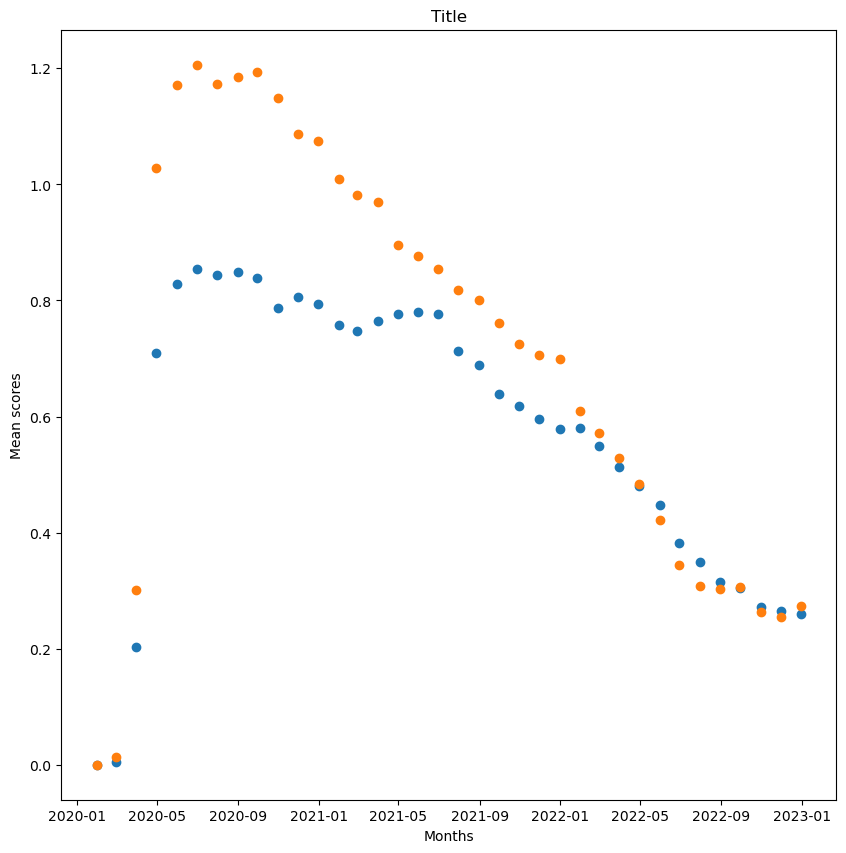

In [195]:
# Scatter plot for selected variables
plt.figure(figsize = (10, 10))

# Scatters the data
plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['E1_combined_numeric'])

plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['E2_combined_numeric'])

# Adds title
plt.title('Title')

# Adds axes titles
plt.ylabel('Mean scores')
plt.xlabel('Months')

# Shows the chart
plt.show()

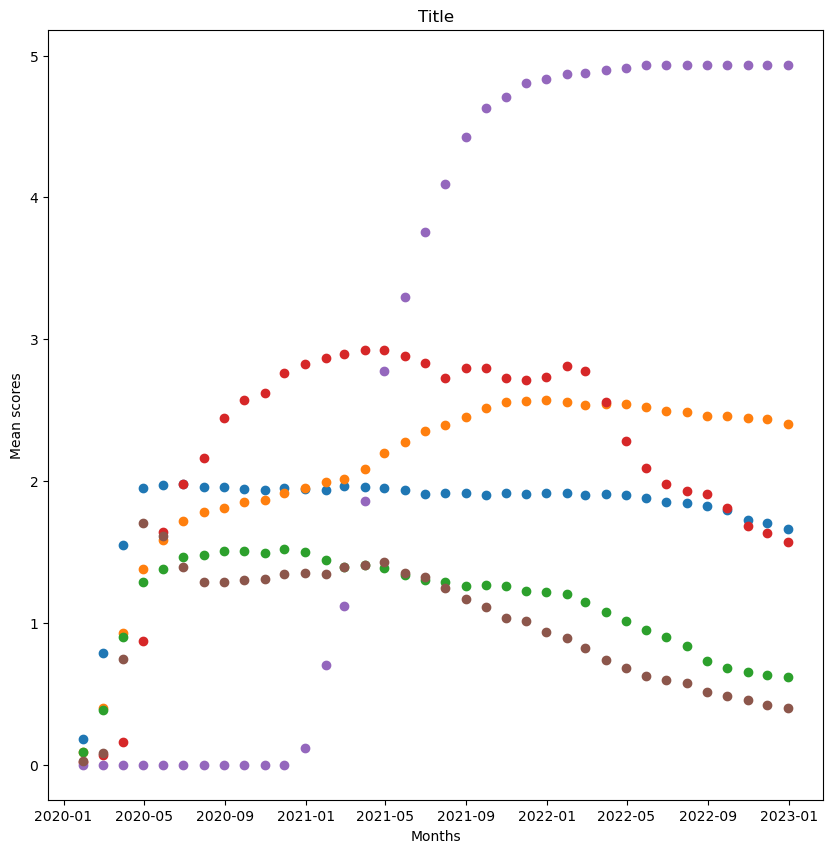

In [196]:
# Scatter plot for selected variables
plt.figure(figsize = (10, 10))

# Scatters the data
plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['H1_combined_numeric'])

plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['H2_combined_numeric'])

plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['H3_combined_numeric'])

plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['H6M_combined_numeric'])

plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['H7_combined_numeric'])

plt.scatter(x = oxcgrt_simple_datetime_monthly.index, 
            y = oxcgrt_simple_datetime_monthly['H8M_combined_numeric'])


# Adds title
plt.title('Title')

# Adds axes titles
plt.ylabel('Mean scores')
plt.xlabel('Months')

# Shows the chart
plt.show()

In [197]:
# Resamples the dataframe to put all of the daily measurements across the world together
oxcgrt_simple_datetime_daily = oxcgrt_simple.resample('D').mean()

In [198]:
# Checks the change
oxcgrt_simple_datetime_daily

,C1M_combined_numeric,C2M_combined_numeric,C3M_combined_numeric,C4M_combined_numeric,C5M_combined_numeric,C6M_combined_numeric,C7M_combined_numeric,C8EV_combined_numeric,E1_combined_numeric,E2_combined_numeric,...,H6M_combined_numeric,H7_combined_numeric,H8M_combined_numeric,V1..summary.,V2..summary.,V3..summary.,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010811,0.000000,0.000000,...,0.002703,0.000000,0.010811,0.000000,0.000000,0.005405,0.180216,0.223730,0.255784,0.000000
2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016216,0.000000,0.000000,...,0.002703,0.000000,0.021622,0.000000,0.000000,0.005405,0.285297,0.316703,0.361946,0.000000
2020-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016216,0.000000,0.000000,...,0.002703,0.000000,0.021622,0.000000,0.000000,0.005405,0.315351,0.333568,0.381243,0.000000
2020-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016216,0.000000,0.000000,...,0.002703,0.000000,0.021622,0.000000,0.000000,0.005405,0.315351,0.367351,0.419838,0.000000
2020-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016216,0.000000,0.000000,...,0.002703,0.000000,0.021622,0.000000,0.000000,0.005405,0.330378,0.392703,0.448757,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,0.205405,0.267568,0.256757,0.245946,0.051351,0.043243,0.062162,0.416216,0.262162,0.281081,...,1.564865,4.935135,0.394595,1.972973,2.745946,4.951351,15.470811,26.757946,28.640324,13.581081
2022-12-28,0.205405,0.267568,0.256757,0.245946,0.051351,0.043243,0.062162,0.421622,0.262162,0.281081,...,1.564865,4.935135,0.394595,1.972973,2.745946,4.951351,15.485838,26.766432,28.649946,13.581081
2022-12-29,0.194595,0.262162,0.251351,0.229730,0.051351,0.043243,0.062162,0.410811,0.262162,0.281081,...,1.564865,4.935135,0.394595,1.972973,2.745946,4.951351,15.317351,26.671676,28.541676,13.581081


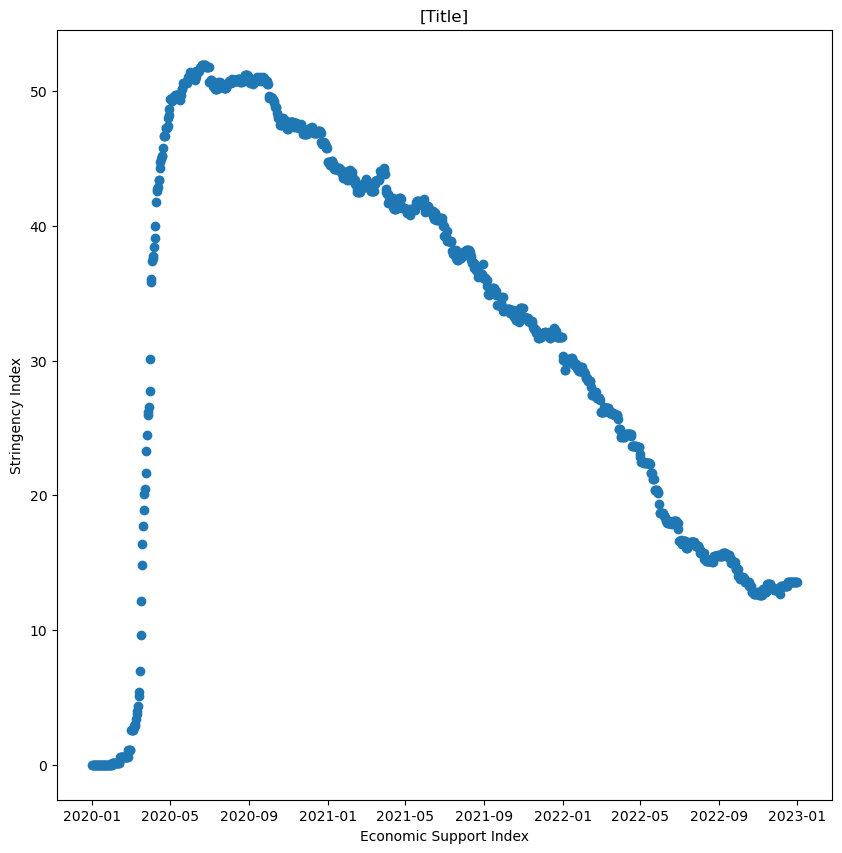

In [199]:
# Scatter plot for selected variables
plt.figure(figsize = (10, 10))

# Scatters the data
plt.scatter(x = oxcgrt_simple_datetime_daily.index, y = oxcgrt_simple_datetime_daily['EconomicSupportIndex'])

# Adds title
plt.title('[Title]')

# Adds axes titles
plt.ylabel('Stringency Index')
plt.xlabel('Economic Support Index')

# Shows the chart
plt.show()

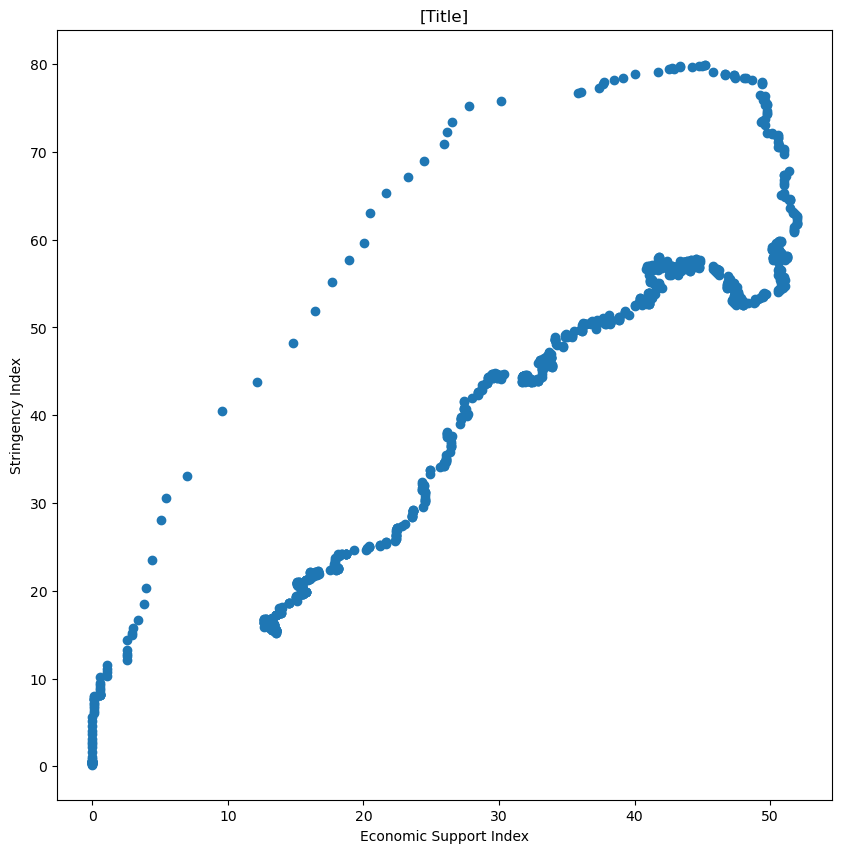

In [200]:
# Scatter plot for selected variables
plt.figure(figsize = (10, 10))

# Scatters the data
plt.scatter(x = oxcgrt_simple_datetime_daily['EconomicSupportIndex'], y = oxcgrt_simple_datetime_daily['StringencyIndex_Average'])

# Adds title
plt.title('[Title]')

# Adds axes titles
plt.ylabel('Stringency Index')
plt.xlabel('Economic Support Index')

# Shows the chart
plt.show()

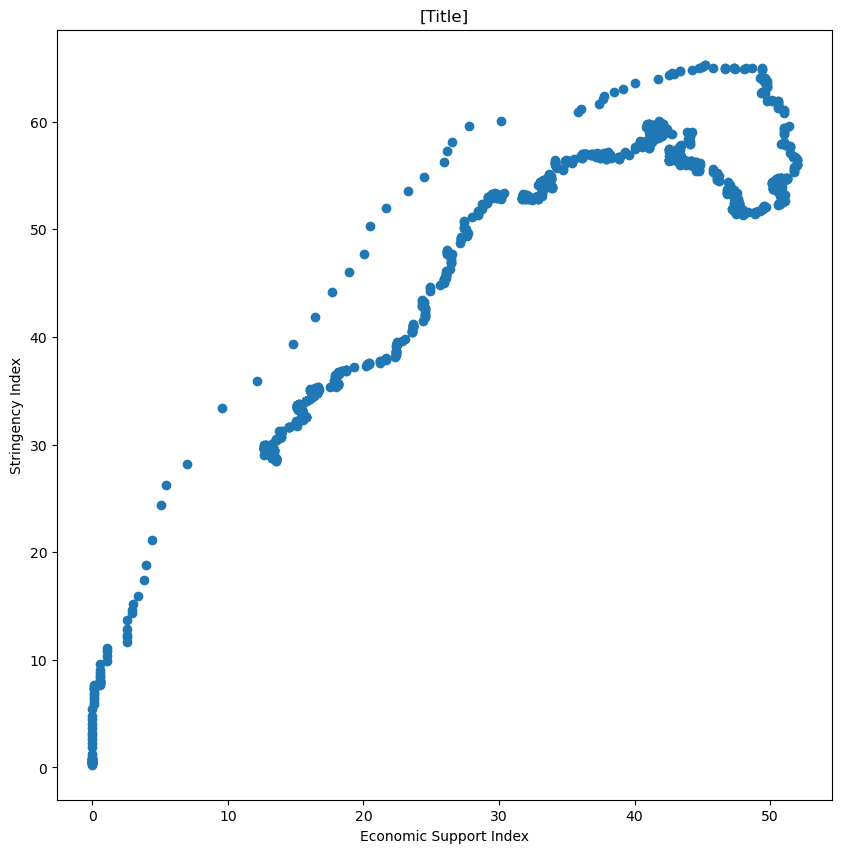

In [201]:
# Scatter plot for selected variables
plt.figure(figsize = (10, 10))

# Scatters the data
plt.scatter(x = oxcgrt_simple_datetime_daily['EconomicSupportIndex'], y = oxcgrt_simple_datetime_daily['ContainmentHealthIndex_Average'])

# Adds title
plt.title('[Title]')

# Adds axes titles
plt.ylabel('Stringency Index')
plt.xlabel('Economic Support Index')

# Shows the chart
plt.show()

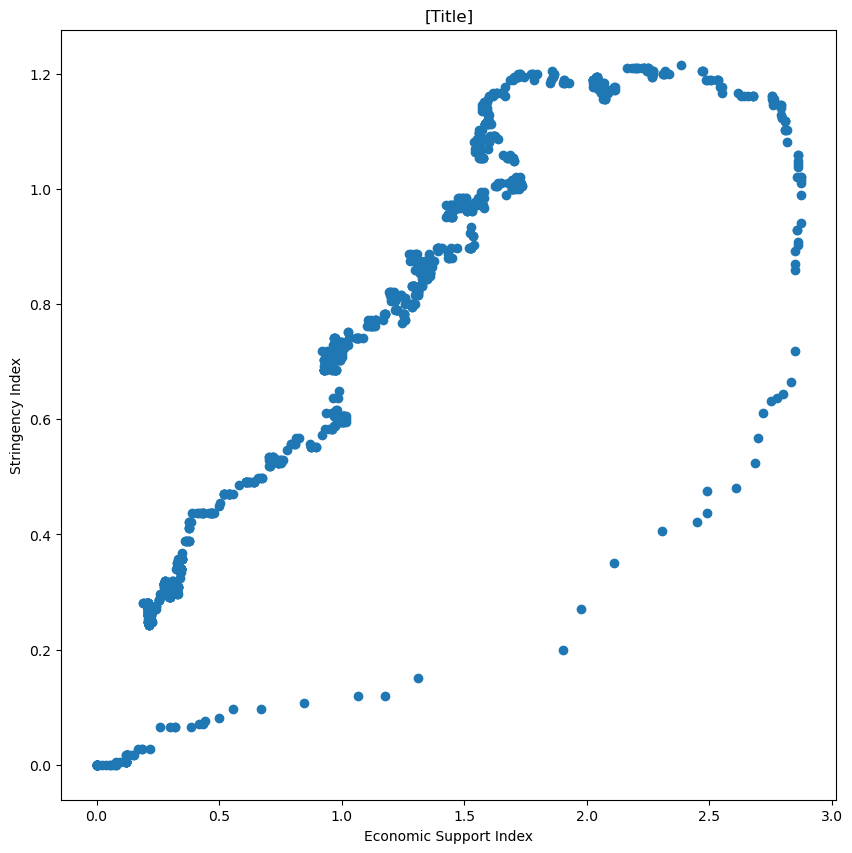

In [202]:
# Scatter plot for selected variables
plt.figure(figsize = (10, 10))

# Scatters the data
plt.scatter(x = oxcgrt_simple_datetime_daily['C1M_combined_numeric'], y = oxcgrt_simple_datetime_daily['E2_combined_numeric'])

# Adds title
plt.title('[Title]')

# Adds axes titles
plt.ylabel('Stringency Index')
plt.xlabel('Economic Support Index')

# Shows the chart
plt.show()

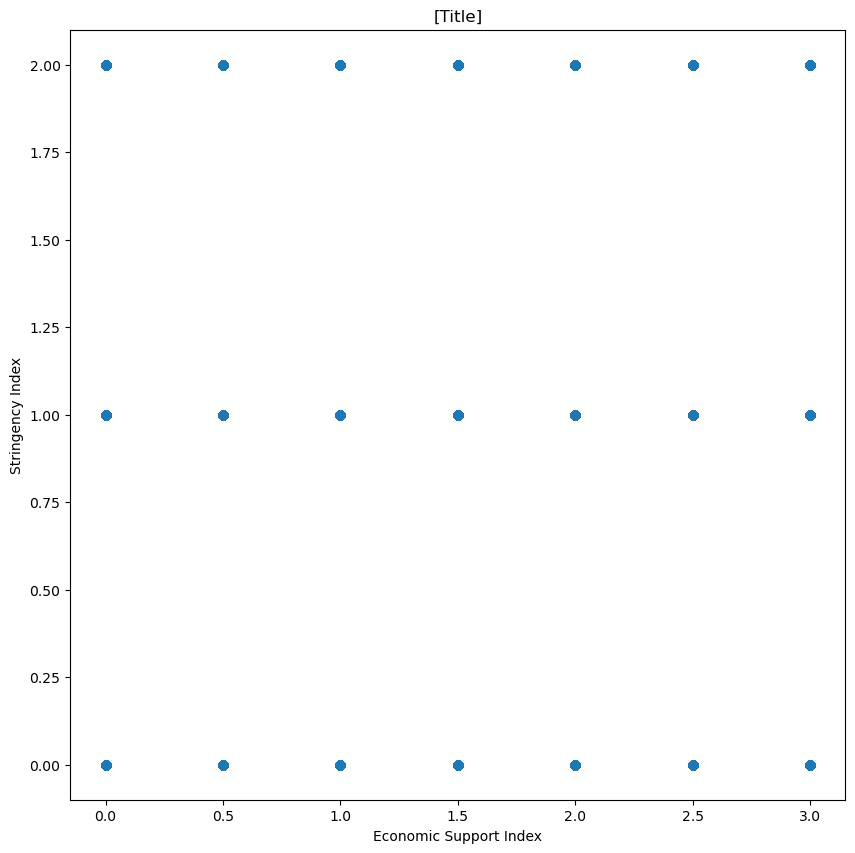

In [203]:
# Scatter plot for selected variables
plt.figure(figsize = (10, 10))

# Scatters the data
plt.scatter(x = oxcgrt_simple['C1M_combined_numeric'], y = oxcgrt_simple['E2_combined_numeric'])

# Adds title
plt.title('[Title]')

# Adds axes titles
plt.ylabel('Stringency Index')
plt.xlabel('Economic Support Index')

# Shows the chart
plt.show()

In [225]:
# Groups by countries on the mean
oxcgrt_simple_country_groups = oxcgrt_simple.groupby(by = 'CountryName', axis = 'index').mean()

In [226]:
# Shows the dataframe
oxcgrt_simple_country_groups

,C1M_combined_numeric,C2M_combined_numeric,C3M_combined_numeric,C4M_combined_numeric,C5M_combined_numeric,C6M_combined_numeric,C7M_combined_numeric,C8EV_combined_numeric,E1_combined_numeric,E2_combined_numeric,...,H6M_combined_numeric,H7_combined_numeric,H8M_combined_numeric,V1..summary.,V2..summary.,V3..summary.,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.922445,1.262318,0.887318,0.620438,0.488139,0.242245,0.258668,1.357664,0.000000,0.028285,...,2.225365,2.913321,0.481296,1.208029,1.187956,3.088504,27.394580,26.088869,29.713878,0.707117
Albania,1.250000,1.194343,1.129562,2.449818,0.205292,1.164234,0.241788,1.179745,0.656022,0.767336,...,2.314781,2.711679,1.503650,1.173358,1.506387,3.284672,41.782108,44.866277,46.193239,35.583942
Algeria,1.192518,1.463504,1.462135,2.222628,0.652828,0.817518,0.528285,2.154197,0.270073,0.838504,...,2.605839,2.806569,0.854015,1.080292,1.080292,3.193431,48.367728,46.918586,49.662755,27.714416
Andorra,0.784672,1.102190,0.964416,1.722628,0.594891,0.133212,0.027372,1.165146,1.297445,0.958029,...,2.178832,2.980839,1.613139,1.186131,1.626825,3.161496,33.486770,46.759234,45.384489,56.386861
Angola,0.812956,1.824361,1.215785,2.093066,0.604471,0.877281,1.102190,2.393248,0.352190,0.167883,...,2.775547,2.844891,0.414234,1.129562,1.470803,3.047445,51.621734,44.556122,49.063431,13.001825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,1.806569,1.411040,1.100821,2.180657,0.577555,1.112226,1.006387,2.760949,0.228102,1.149635,...,3.177920,2.399635,0.677920,1.075730,1.424270,3.111314,55.201442,49.676816,51.853595,34.443431
Vietnam,1.358120,1.445255,1.233577,2.512318,0.834398,0.741332,0.931113,2.551095,0.336679,0.368613,...,2.478102,2.490876,0.865876,0.975365,1.266423,3.029197,54.682801,52.780776,57.801870,17.632299
Yemen,0.819343,0.595803,0.644161,0.000000,0.000000,0.949361,0.569343,1.945255,0.000000,0.000000,...,0.686588,1.775547,0.389142,0.577555,0.566606,2.833029,25.444097,20.958914,23.954507,0.000000


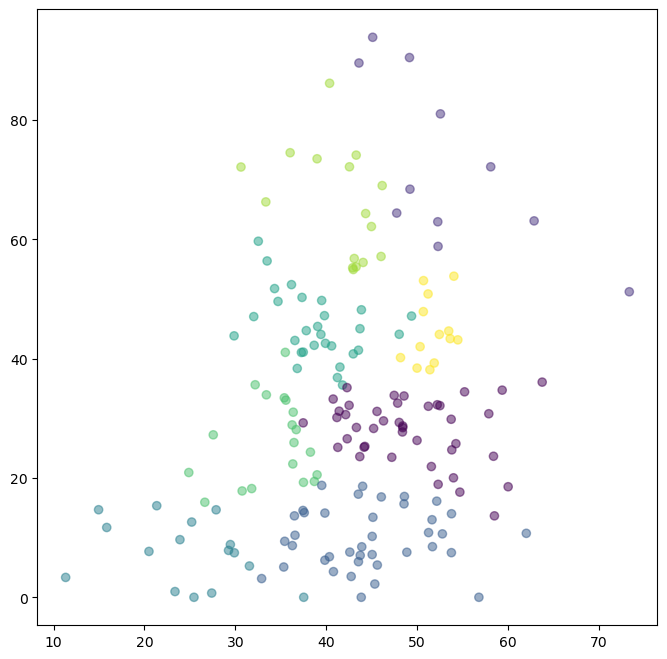

In [233]:
from sklearn.cluster import AgglomerativeClustering

# Initialises the agglomeration with a select nymber of clusters
agglomerative = AgglomerativeClustering(n_clusters=8, linkage='ward')

# Fit and predict
cluster_labels = agglomerative.fit_predict(oxcgrt_simple_country_groups)

# Visualize with centers
plt.figure(figsize=(8, 8))

plt.scatter(x = oxcgrt_simple_country_groups['StringencyIndex_Average'], 
            y = oxcgrt_simple_country_groups['EconomicSupportIndex'],
            c=cluster_labels, alpha=0.5)




plt.show()

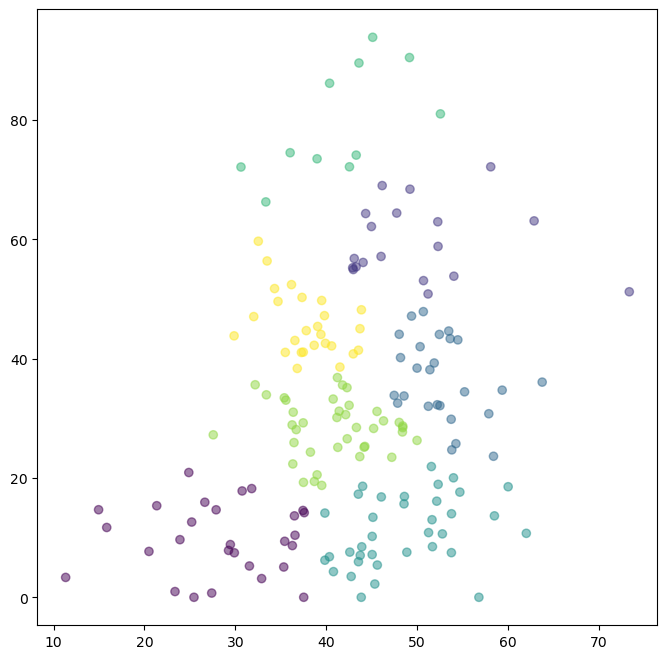

In [241]:
from sklearn.cluster import KMeans

# Initialize
kmeans = KMeans(n_clusters=7)

# Fit
kmeans.fit(oxcgrt_simple_country_groups[['StringencyIndex_Average', 'EconomicSupportIndex']])

# Predict
cluster_labels = kmeans.predict(oxcgrt_simple_country_groups[['StringencyIndex_Average', 'EconomicSupportIndex']])

plt.figure(figsize=(8,8))
plt.scatter(x = oxcgrt_simple_country_groups['StringencyIndex_Average'], 
            y = oxcgrt_simple_country_groups['EconomicSupportIndex'],
            c=cluster_labels, alpha=0.5)
plt.show()

In [242]:
# Cluster centers - stored in the model after calling .fit
centers = kmeans.cluster_centers_
centers

array([[28.45635134,  9.7399635 ],
       [49.96272378, 59.47764599],
       [52.68246561, 36.49854366],
       [48.42961932, 11.03285939],
       [41.41054827, 79.45006636],
       [40.92376404, 28.29169006],
       [37.8511921 , 45.68535935]])

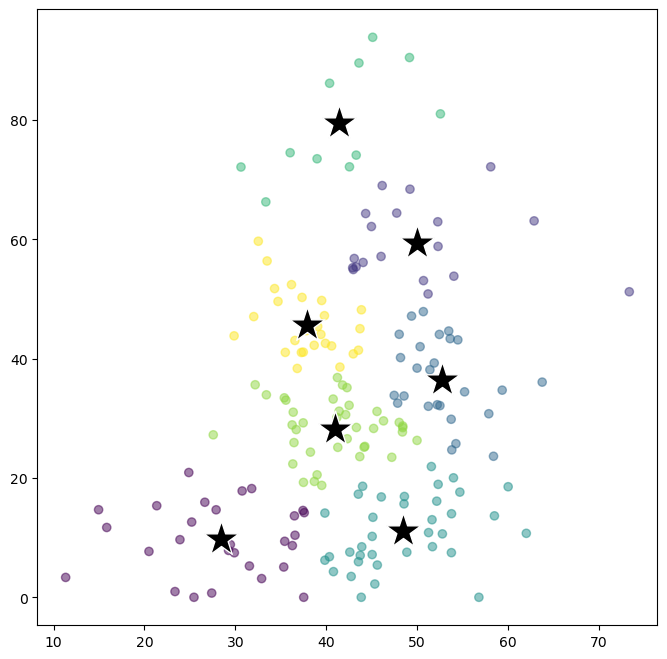

In [243]:
plt.figure(figsize=(8,8))
plt.scatter(x = oxcgrt_simple_country_groups['StringencyIndex_Average'], 
            y = oxcgrt_simple_country_groups['EconomicSupportIndex'],
            c=cluster_labels, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], 
            c='black', marker="*", edgecolor="white", s=700)
plt.show()

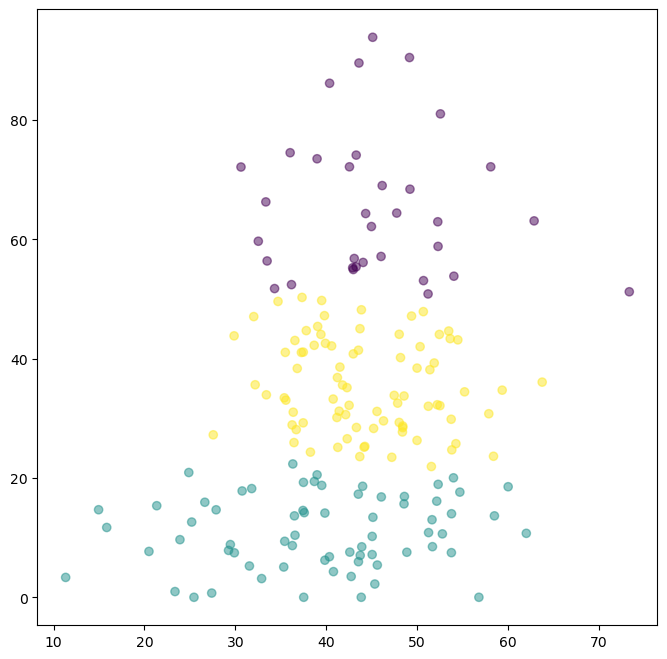

In [ ]:
plt.scatter(y = oxcgrt_simple_datetime_monthly.index, 
            x = oxcgrt_simple_datetime_monthly['C2M_combined_numeric'],
            c=cluster_labels, alpha=0.5)

plt.scatter(y = oxcgrt_simple_datetime_monthly.index, 
            x = oxcgrt_simple_datetime_monthly['C3M_combined_numeric'],
            c=cluster_labels, alpha=0.5)

plt.scatter(y = oxcgrt_simple_datetime_monthly.index, 
            x = oxcgrt_simple_datetime_monthly['C4M_combined_numeric'],
            c=cluster_labels, alpha=0.5)

plt.scatter(y = oxcgrt_simple_datetime_monthly.index, 
            x = oxcgrt_simple_datetime_monthly['C5M_combined_numeric'],
            c=cluster_labels, alpha=0.5)

plt.scatter(y = oxcgrt_simple_datetime_monthly.index, 
            x = oxcgrt_simple_datetime_monthly['C6M_combined_numeric'],
            c=cluster_labels, alpha=0.5)

plt.scatter(y = oxcgrt_simple_datetime_monthly.index, 
            x = oxcgrt_simple_datetime_monthly['C7M_combined_numeric'],
            c=cluster_labels, alpha=0.5)

plt.scatter(y = oxcgrt_simple_datetime_monthly.index, 
            x = oxcgrt_simple_datetime_monthly['C8EV_combined_numeric'],
            c=cluster_labels, alpha=0.5)

## Data exporting
<a id='data_exporting'></a>

<div class="alert-info">
Exporting the clean versions of respective datasets. 
</div>

In [55]:
# Makes the final data frame into a clean CSV
#oxcgrt_simple.to_csv('oxcgrt_simple.csv')

## Conclusion
<a id='conclusion'></a>

<div class="alert-info">
[Insert]
   
</div>